In [12]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [8]:
ivs_table = pd.read_csv('./original.csv')
ivs_table

,Query,Target,Diversity,Similarity
0,10000_Restaurant_Reviews,2022_NEXT_UK-PM-Tweets,0.006356,0.030365
1,10000_Restaurant_Reviews,2023-02-27-yc-companies,0.013209,0.061434
2,10000_Restaurant_Reviews,5-Minute_Crafts,0.014355,0.099689
3,10000_Restaurant_Reviews,700_Classic_Disco_Tracks_(with_Spotify_Data),0.021902,-0.031660
4,10000_Restaurant_Reviews,air-canada-review,0.014489,0.022315
...,...,...,...,...
23000,word_analogy_test,youtube_video,0.016992,0.023238
23001,word_analogy_test,zomato_cafe,0.021961,0.007818
23002,World_Important_Dates,youtube_video,0.020253,0.029538
23003,World_Important_Dates,zomato_cafe,0.023071,0.046627


In [ ]:
scaler = MinMaxScaler()

def ivs(weight, div, sim):
    return weight*div + (1-weight)*sim

In [11]:
ivs_table[['scaled_div', 'scaled_sim']] = scaler.fit_transform(ivs_table[['Diversity', 'Similarity']])
ivs_table

,Query,Target,Diversity,Similarity,scaled_div,scaled_sim
0,10000_Restaurant_Reviews,2022_NEXT_UK-PM-Tweets,0.006356,0.030365,0.100994,0.358781
1,10000_Restaurant_Reviews,2023-02-27-yc-companies,0.013209,0.061434,0.248554,0.428162
2,10000_Restaurant_Reviews,5-Minute_Crafts,0.014355,0.099689,0.273241,0.513592
3,10000_Restaurant_Reviews,700_Classic_Disco_Tracks_(with_Spotify_Data),0.021902,-0.031660,0.435761,0.220268
4,10000_Restaurant_Reviews,air-canada-review,0.014489,0.022315,0.276133,0.340804
...,...,...,...,...,...,...
23000,word_analogy_test,youtube_video,0.016992,0.023238,0.330036,0.342865
23001,word_analogy_test,zomato_cafe,0.021961,0.007818,0.437034,0.308430
23002,World_Important_Dates,youtube_video,0.020253,0.029538,0.400254,0.356934
23003,World_Important_Dates,zomato_cafe,0.023071,0.046627,0.460930,0.395096


In [13]:
# before min-max scaling

def visualization(div, sim):
    '''
    div : 'Diversity', 'scaled_div'
    sim : 'Similarity', 'scaled_sim'
    '''
    diversity_stats = {
        'Min': ivs_table[div].min(),
        'Mean': ivs_table[div].mean(),
        'Max': ivs_table[div].max()
    }

    similarity_stats = {
        'Min': ivs_table[sim].min(),
        'Mean': ivs_table[sim].mean(),
        'Max': ivs_table[sim].max()
    }

    summary_df = pd.DataFrame([diversity_stats, similarity_stats], index=[div, sim])

    print(f"{div} and {sim} Statistics:")
    print("-----------------------------------------")
    print(summary_df)
    print("-----------------------------------------")

    plt.figure(figsize=(12, 6))

    # Diversity Score Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(ivs_table[div], bins=30, kde=True, color='skyblue')
    plt.title(f'{div} Score Distribution')
    plt.xlabel(f'{div} Score')
    plt.ylabel('Frequency')

    # Similarity Score Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(ivs_table[sim], bins=30, kde=True, color='salmon')
    plt.title(f'{sim} Score Distribution')
    plt.xlabel(f'{sim} Score')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [17]:
def comparison(div, sim):
    # 겹쳐서 그리기 위한 히스토그램
    plt.figure(figsize=(8, 6))

    # Scaled Diversity와 Similarity를 하나의 그래프에 겹쳐 그리기
    sns.histplot(ivs_table[div], bins=30, kde=True, color='skyblue', label=f'{div}', alpha=0.6)
    sns.histplot(ivs_table[sim], bins=30, kde=True, color='salmon', label=f'{sim}', alpha=0.6)

    plt.title(f'Comparison of {div} and {sim} Score Distributions')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()

Diversity and Similarity Statistics:
-----------------------------------------
                 Min      Mean       Max
Diversity   0.001667  0.016488  0.048103
Similarity -0.130295  0.018342  0.317499
-----------------------------------------


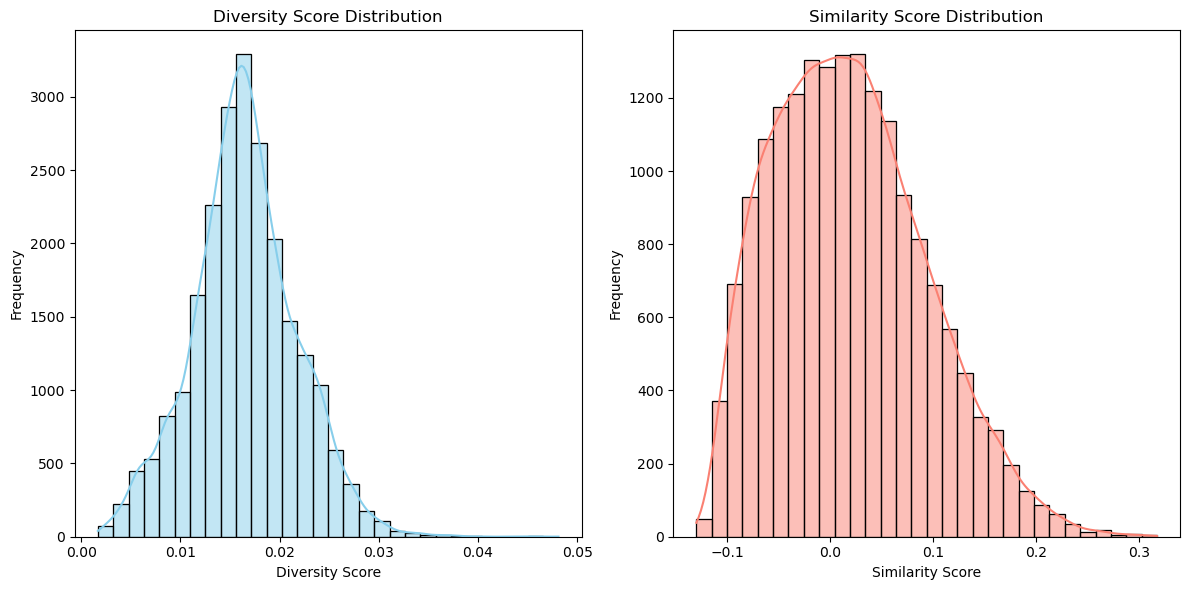

In [14]:
visualization('Diversity', 'Similarity')

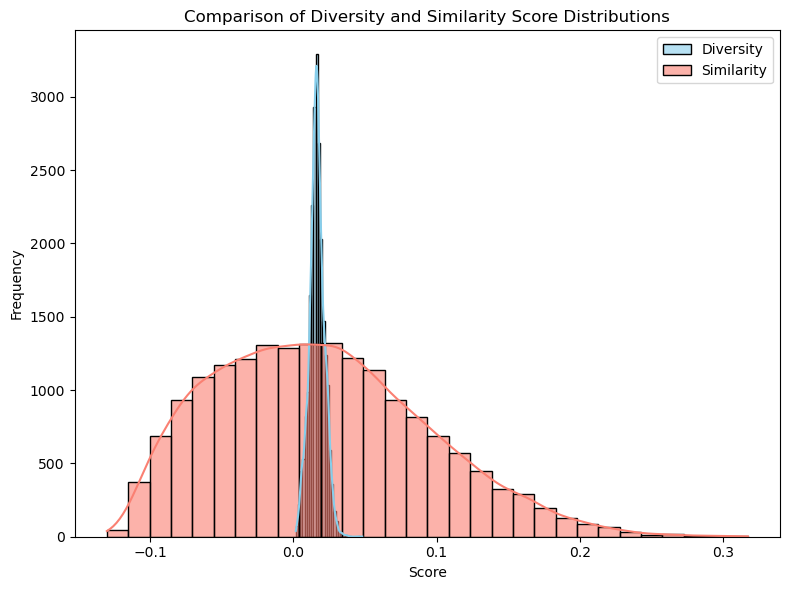

In [18]:
comparison('Diversity', 'Similarity')

scaled_div and scaled_sim Statistics:
-----------------------------------------
            Min      Mean  Max
scaled_div  0.0  0.319178  1.0
scaled_sim  0.0  0.331931  1.0
-----------------------------------------


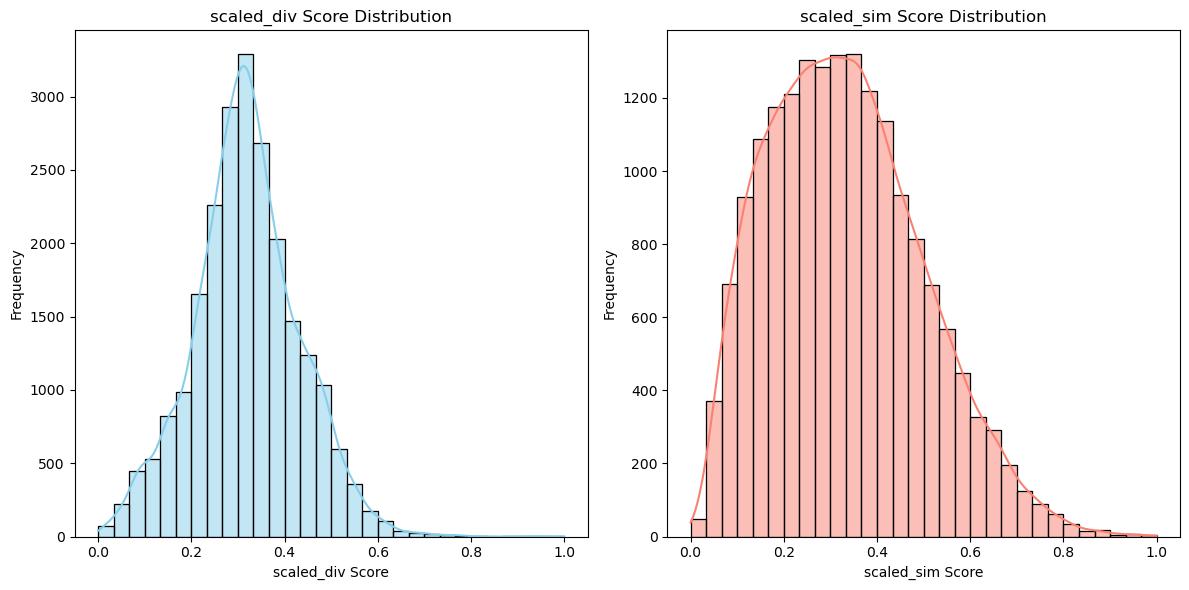

In [15]:
visualization('scaled_div', 'scaled_sim')

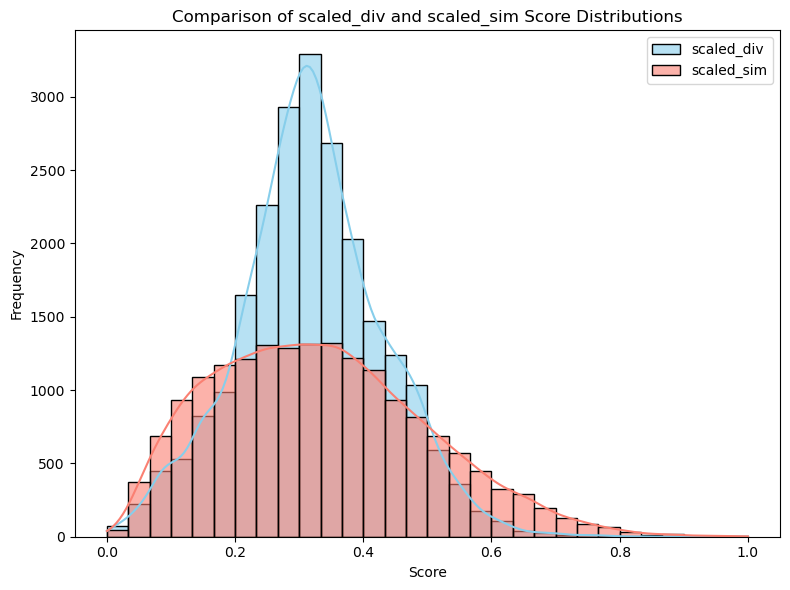

In [19]:
comparison('scaled_div', 'scaled_sim')

In [21]:
ivs_table['IVS'] = ivs_table.apply(lambda row : ivs(0.5, row['Diversity'], row['Similarity']), axis = 1)
ivs_table['scaled_IVS'] = ivs_table.apply(lambda row : ivs(0.5, row['scaled_div'], row['scaled_sim']), axis = 1)
ivs_table

,Query,Target,Diversity,Similarity,scaled_div,scaled_sim,IVS,scaled_IVS
0,10000_Restaurant_Reviews,2022_NEXT_UK-PM-Tweets,0.006356,0.030365,0.100994,0.358781,0.018361,0.229888
1,10000_Restaurant_Reviews,2023-02-27-yc-companies,0.013209,0.061434,0.248554,0.428162,0.037321,0.338358
2,10000_Restaurant_Reviews,5-Minute_Crafts,0.014355,0.099689,0.273241,0.513592,0.057022,0.393417
3,10000_Restaurant_Reviews,700_Classic_Disco_Tracks_(with_Spotify_Data),0.021902,-0.031660,0.435761,0.220268,-0.004879,0.328014
4,10000_Restaurant_Reviews,air-canada-review,0.014489,0.022315,0.276133,0.340804,0.018402,0.308468
...,...,...,...,...,...,...,...,...
23000,word_analogy_test,youtube_video,0.016992,0.023238,0.330036,0.342865,0.020115,0.336450
23001,word_analogy_test,zomato_cafe,0.021961,0.007818,0.437034,0.308430,0.014890,0.372732
23002,World_Important_Dates,youtube_video,0.020253,0.029538,0.400254,0.356934,0.024896,0.378594
23003,World_Important_Dates,zomato_cafe,0.023071,0.046627,0.460930,0.395096,0.034849,0.428013


IVS Statistics:
--------------------------
Min  : -0.057764397155246706
Mean : 0.017386037441749127
Max  : 0.1668952795529071
--------------------------


Text(0, 0.5, 'Frequency')

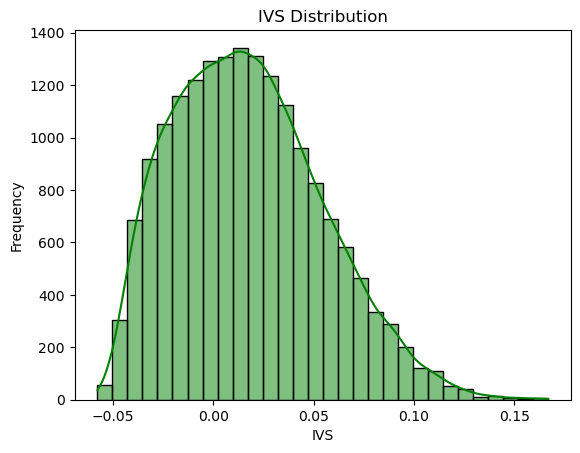

In [22]:
# Integraion Value Score Histogram

print("IVS Statistics:")
print("--------------------------")
print('Min  :', ivs_table['IVS'].min())
print('Mean :', ivs_table['IVS'].mean())
print('Max  :', ivs_table['IVS'].max())
print("--------------------------")

sns.histplot(ivs_table['IVS'], bins=30, kde=True, color='green')
plt.title('IVS Distribution')
plt.xlabel('IVS')
plt.ylabel('Frequency')

Scaled IVS Statistics:
--------------------------
Min  : 0.02472541566769277
Mean : 0.3249307967431417
Max  : 0.7795042987973714
--------------------------


Text(0, 0.5, 'Frequency')

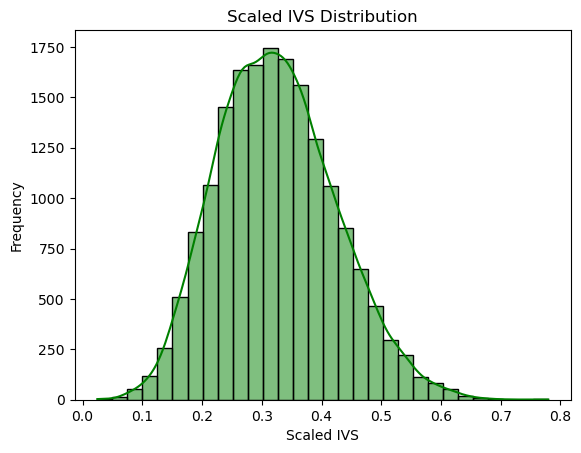

In [23]:
# Integraion Value Score Histogram

print("Scaled IVS Statistics:")
print("--------------------------")
print('Min  :', ivs_table['scaled_IVS'].min())
print('Mean :', ivs_table['scaled_IVS'].mean())
print('Max  :', ivs_table['scaled_IVS'].max())
print("--------------------------")

sns.histplot(ivs_table['scaled_IVS'], bins=30, kde=True, color='green')
plt.title('Scaled IVS Distribution')
plt.xlabel('Scaled IVS')
plt.ylabel('Frequency')